In [227]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [228]:
df = pd.read_csv("C:\\Users\\G Varun\\PycharmProjects\\pythonProject\\FinanceForecaster\\data\\HDFC.csv")

In [229]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [230]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


In [232]:
df = df.asfreq('B')

In [233]:
first_year_df = df.loc['2000-01-03':'2000-12-29']

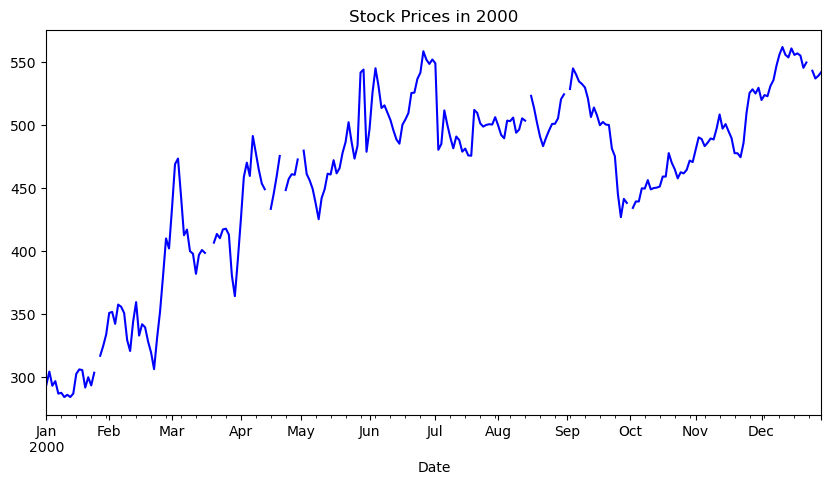

In [234]:
first_year_df['Close'].plot(title="Stock Prices in 2000", figsize=(10,5), color='blue')
plt.show()

In [235]:
def check_stationarity(series):
    result = adfuller(series)
    return result[0], result[1]

In [236]:
first_year_df.shape

(260, 14)

In [237]:
first_year_df.shape

(260, 14)

In [238]:
first_year_df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.5,293.5,293.50,293.50,22744.0,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.0,304.0,304.05,303.62,255251.0,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.0,295.0,292.80,294.53,269087.0,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.0,296.0,296.45,300.14,305916.0,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.0,287.1,286.55,288.80,197039.0,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-26,HDFC,EQ,549.30,555.00,560.00,540.0,542.9,542.75,545.08,68388.0,3.727666e+12,NaN,NaN,NaN
2000-12-27,HDFC,EQ,542.75,535.10,540.00,530.1,538.0,536.60,534.88,29822.0,1.595108e+12,NaN,NaN,NaN


In [239]:
first_year_df.isna().sum()

Symbol                 10
Series                 10
Prev Close             10
Open                   10
High                   10
Low                    10
Last                   10
Close                  10
VWAP                   10
Volume                 10
Turnover               10
Trades                260
Deliverable Volume    260
%Deliverble           260
dtype: int64

In [240]:
first_year_df = first_year_df.copy()
first_year_df['Close'] = first_year_df['Close'].fillna(method='ffill')

In [241]:
first_year_df.isna().sum()

Symbol                 10
Series                 10
Prev Close             10
Open                   10
High                   10
Low                    10
Last                   10
Close                   0
VWAP                   10
Volume                 10
Turnover               10
Trades                260
Deliverable Volume    260
%Deliverble           260
dtype: int64

In [242]:
first_year_df['Close_diff'] = first_year_df['Close'].diff() #first order differencing

In [243]:
first_year_df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close_diff
Date,,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.5,293.5,293.50,293.50,22744.0,6.675364e+11,NaN,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.0,304.0,304.05,303.62,255251.0,7.749972e+12,NaN,NaN,NaN,10.55
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.0,295.0,292.80,294.53,269087.0,7.925368e+12,NaN,NaN,NaN,-11.25
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.0,296.0,296.45,300.14,305916.0,9.181669e+12,NaN,NaN,NaN,3.65
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.0,287.1,286.55,288.80,197039.0,5.690480e+12,NaN,NaN,NaN,-9.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.30,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2000-12-26,HDFC,EQ,549.30,555.00,560.00,540.0,542.9,542.75,545.08,68388.0,3.727666e+12,NaN,NaN,NaN,-6.55
2000-12-27,HDFC,EQ,542.75,535.10,540.00,530.1,538.0,536.60,534.88,29822.0,1.595108e+12,NaN,NaN,NaN,-6.15


In [244]:
first_year_df['Close_diff'].isna().sum()

1

In [245]:
first_year_df.shape

(260, 15)

In [246]:
first_year_df = first_year_df.dropna(subset=['Close_diff'])

In [247]:
first_year_df.isna().sum()

Symbol                 10
Series                 10
Prev Close             10
Open                   10
High                   10
Low                    10
Last                   10
Close                   0
VWAP                   10
Volume                 10
Turnover               10
Trades                259
Deliverable Volume    259
%Deliverble           259
Close_diff              0
dtype: int64

In [248]:
adf_test = check_stationarity(first_year_df['Close_diff'])
print("ADF Statistic: ", adf_test[0])
print("p-val: ", adf_test[1])

ADF Statistic:  -7.976124687747317
p-val:  2.6994606792103456e-12


# Data is now stationary after differencing

# ARIMA model training

In [249]:
p, d, q = 1, 1, 1
model = ARIMA(first_year_df['Close'], order=(p, d, q))
model_fit = model.fit()

In [250]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1036.422
Date:                Wed, 26 Mar 2025   AIC                           2078.844
Time:                        15:22:59   BIC                           2089.503
Sample:                    01-04-2000   HQIC                          2083.130
                         - 12-29-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4466      0.185     -2.416      0.016      -0.809      -0.084
ma.L1          0.6397      0.163      3.916      0.000       0.320       0.960
sigma2       180.5665      9.366     19.279      0.000     162.209     198.924
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               223.31
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecasting

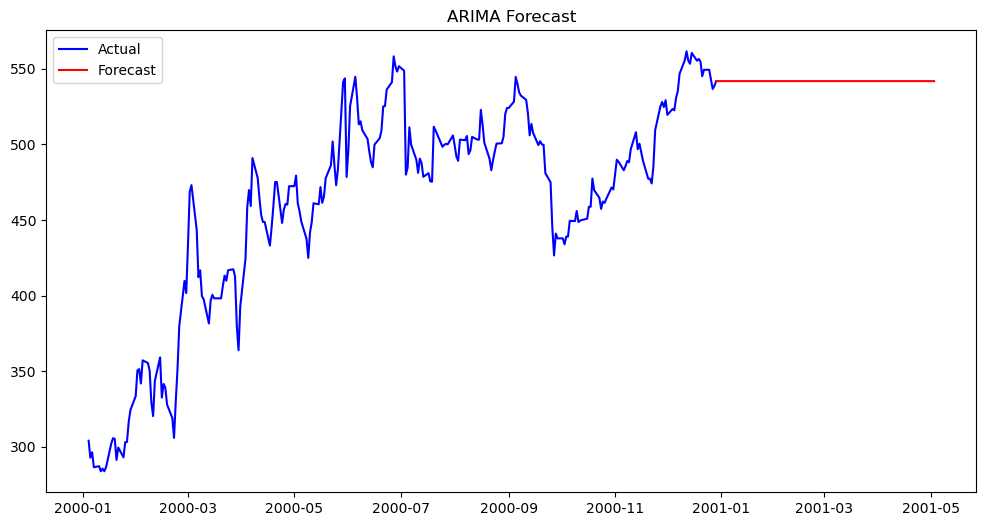

In [251]:
forecast_steps = 90  # Approx 6 months
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(first_year_df.index, first_year_df['Close'], label="Actual", color="blue")
plt.plot(pd.date_range(first_year_df.index[-1], periods=forecast_steps, freq='B'), forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [252]:
# Forecast for the next 6 months (~126 trading days)
forecast_steps = 126
forecast_values = model_fit.forecast(steps=forecast_steps)

# Create a date index for the forecasted period
forecast_index = pd.date_range(start=first_year_df.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast_values.index = forecast_index  # Assign index to predictions

In [253]:
print(forecast_values)

2001-01-01    541.816772
2001-01-02    541.809283
2001-01-03    541.812627
2001-01-04    541.811134
2001-01-05    541.811800
                 ...    
2001-06-19    541.811595
2001-06-20    541.811595
2001-06-21    541.811595
2001-06-22    541.811595
2001-06-25    541.811595
Freq: B, Name: predicted_mean, Length: 126, dtype: float64


In [254]:
actual_values = df.loc[forecast_index, 'Close']

# SARIMA Model

In [255]:
sarima_model = SARIMAX(first_year_df['Close'], order=(1,1,2), seasonal_order=(1,1,2,12))
sarima_fit = sarima_model.fit()

forecast_values = sarima_fit.forecast(steps=126)
forecast_values.index = pd.date_range(start=first_year_df.index[-1], periods=126+1, freq='B')[1:]

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [256]:
forecast_values

2001-01-01    545.672611
2001-01-02    549.645266
2001-01-03    549.037546
2001-01-04    542.717587
2001-01-05    544.012885
                 ...    
2001-06-19    669.847192
2001-06-20    667.408257
2001-06-21    661.596387
2001-06-22    661.980711
2001-06-25    663.571584
Freq: B, Name: predicted_mean, Length: 126, dtype: float64

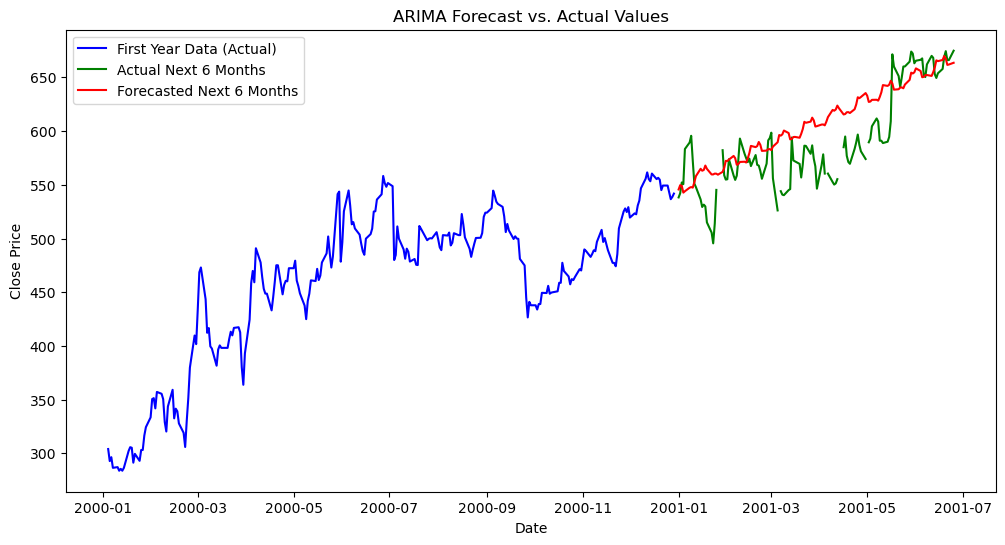

In [257]:
plt.figure(figsize=(12,6))

# Plot actual values (first year)
plt.plot(first_year_df.index, first_year_df['Close'], label="First Year Data (Actual)", color="blue")

# Plot actual future values
plt.plot(actual_values.index, actual_values, label="Actual Next 6 Months", color="green")

# Plot forecasted values
plt.plot(forecast_values.index, forecast_values, label="Forecasted Next 6 Months", color="red")

plt.legend()
plt.title("ARIMA Forecast vs. Actual Values")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Evaluation

In [258]:
actual_values = df.loc[forecast_values.index, 'Close'].ffill()
print(actual_values.shape)
print(actual_values.isna().sum())
#actual_values = actual_values.dropna()
#print(actual_values.isna().sum())

(126,)
0


In [259]:
print(forecast_values.shape)
print(forecast_values.isna().sum())
#actual_values = actual_values.dropna()
#print(actual_values.isna().sum())

(126,)
0


In [260]:
print(actual_values.shape)
print(forecast_values.shape)

(126,)
(126,)


# Evaluation result

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 27.630696292714397
RMSE: 33.67712195032792


C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


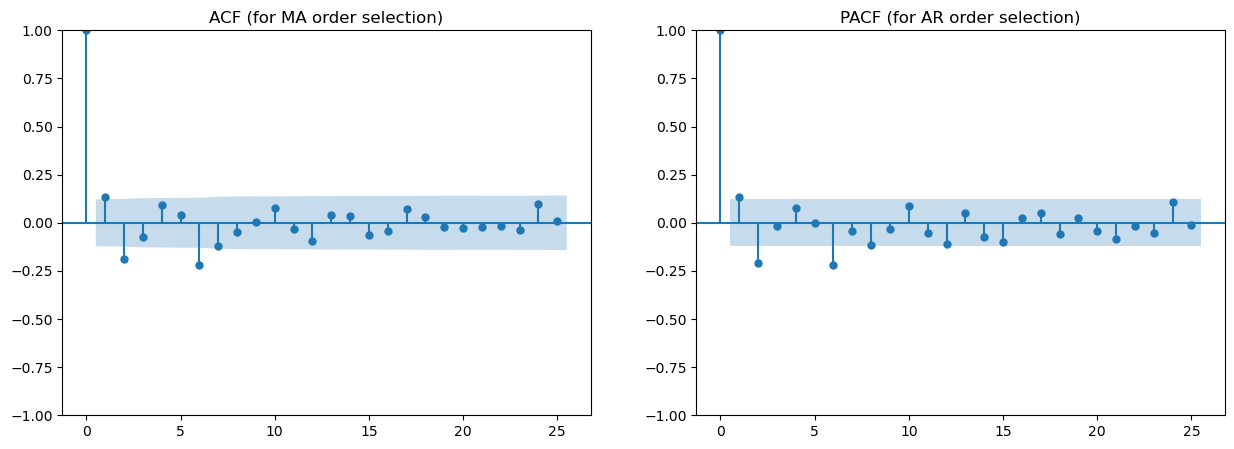

In [262]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15,5))

plot_acf(first_year_df['Close_diff'].dropna(), ax=axes[0])
axes[0].set_title('ACF (for MA order selection)')

plot_pacf(first_year_df['Close_diff'].dropna(), ax=axes[1])
axes[1].set_title('PACF (for AR order selection)')

plt.show()